# Note - Pipeline 2:
> <b> Required Order: </b> 
    * Descriptive
    * Imputation
    * Calculation
<b> Optional Order: </b>
    * Standardization - Min-Max
    * Normalization
    * Outlier stdev
<b> Required Order: </b>
    * Correlation
    * Binning
    * Feature Selection

# Descriptives #

In [1]:
# import modules
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

import numpy as np

# Normalization (used in histogram)
from scipy import stats
from scipy.stats import norm
## metric for calculation of kurtosis and skewness
from scipy.stats import kurtosis, skew
## Box-Cox or Yeo-johnson transformation
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from scipy.stats import boxcox

In [2]:
# read csv file to a pandas dataframe
df = pd.read_csv("online_shoppers_intention.csv")

> Number of Rows, Number of Columns

In [3]:
print('There are # number of rows in the dataset    :', df.shape[0])
print('There are # number of columns in the dataset :', df.shape[1])

There are # number of rows in the dataset    : 12330
There are # number of columns in the dataset : 18


> Show columns with associated datatypes and how many are non-null

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [5]:
# convert table to markdown
# see source: note: https://tableconvert.com/

| Variable                 | # values            |  Data Type |
|--------------------------|--------------------|---------|
| Administrative           | 12330    non\-null | int64   |
| Administrative\_Duration | 12330    non\-null | float64 |
| Informational            | 12330    non\-null | int64   |
| Informational\_Duration  | 12330    non\-null | float64 |
| ProductRelated           | 12330    non\-null | int64   |
| ProductRelated\_Duration | 12330    non\-null | float64 |
| BounceRates              | 12330    non\-null | float64 |
| ExitRates                | 12330    non\-null | float64 |
| PageValues               | 12330    non\-null | float64 |
| SpecialDay               | 12330    non\-null | float64 |
| Month                    | 12330    non\-null | object  |
| OperatingSystems         | 12330    non\-null | int64   |
| Browser                  | 12330    non\-null | int64   |
| Region                   | 12330    non\-null | int64   |
| TrafficType              | 12330    non\-null | int64   |
| VisitorType              | 12330    non\-null | object  |
| Weekend                  | 12330    non\-null | bool    |
| Revenue                  | 12330    non\-null | bool    |


>  Group Columns By Data Type

In [6]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('bool'): Index(['Weekend', 'Revenue'], dtype='object'),
 dtype('int64'): Index(['Administrative', 'Informational', 'ProductRelated', 'OperatingSystems',
        'Browser', 'Region', 'TrafficType'],
       dtype='object'),
 dtype('float64'): Index(['Administrative_Duration', 'Informational_Duration',
        'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
        'SpecialDay'],
       dtype='object'),
 dtype('O'): Index(['Month', 'VisitorType'], dtype='object')}

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
df.describe().round(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00
mean,2.32,80.82,0.50,34.47,31.73,1194.75,0.02,0.04,5.89,0.06,2.12,2.36,3.15,4.07
std,3.32,176.78,1.27,140.75,44.48,1913.67,0.05,0.05,18.57,0.20,0.91,1.72,2.40,4.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,7.00,184.14,0.00,0.01,0.00,0.00,2.00,2.00,1.00,2.00
50%,1.00,7.50,0.00,0.00,18.00,598.94,0.00,0.03,0.00,0.00,2.00,2.00,3.00,2.00
75%,4.00,93.26,0.00,0.00,38.00,1464.16,0.02,0.05,0.00,0.00,3.00,2.00,4.00,4.00
max,27.00,3398.75,24.00,2549.38,705.00,63973.52,0.20,0.20,361.76,1.00,8.00,13.00,9.00,20.00


In [9]:
# show unique elements for feature Month
print(df['Month'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [10]:
print(df['TrafficType'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]


In [11]:
# show unique elements for feature VisitorType
print(df['VisitorType'].unique())

['Returning_Visitor' 'New_Visitor' 'Other']


# Visualize Dataset

## Boxplots 

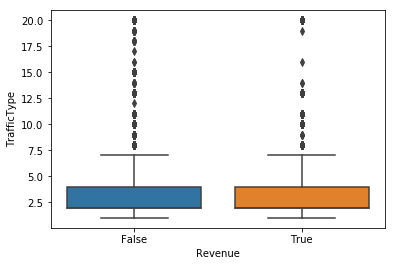

In [12]:
ax = sns.boxplot(y="TrafficType",x="Revenue", data=df)

## Histograms 

In [13]:
# function for histogram
def plot_hist_norm(df, column, bin_amount=25):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(df[column])

    # Plot the histogram.
    ## Set the alpha value used for blending (how transparent the color is)
    plt.hist(df[column], bins=bin_amount, density=True, alpha=0.8, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

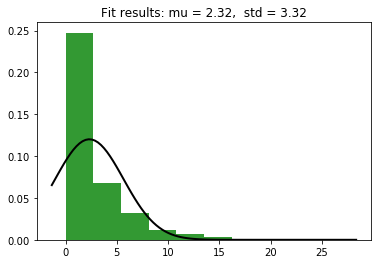

In [14]:
plot_hist_norm(df, column='Administrative', bin_amount=10)

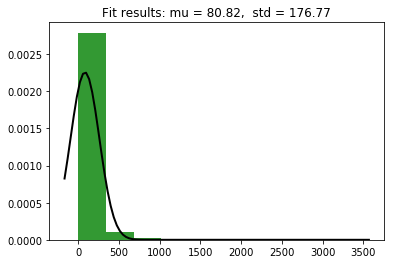

In [15]:
plot_hist_norm(df, column='Administrative_Duration', bin_amount=10)

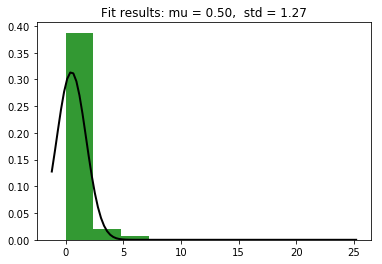

In [16]:
plot_hist_norm(df, column='Informational', bin_amount=10)

# Imputation #

# Calculation #

# Standardization - Min-Max #

In [17]:
# Save Feature C1 -> before standardization (but after outlier IQR and Normalization)
df['Administrative_beforezscore'] = df['Administrative']

In [18]:
# -------------------------------------------------------------------------------------------------------------
# Strategy 2 for Standardization - Min-Max 
# -------------------------------------------------------------------------------------------------------------
# source: https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn
# formula: (x-min_x)/(max_x - min_x)

# create a function for min max standardization (continuous features)
from sklearn.preprocessing import StandardScaler
def replace_columns_minmax(df, column_list):
    scaler = preprocessing.MinMaxScaler()
    # transform using min max function from sklearn.preprocessing.minmax
    df[column_list] = scaler.fit_transform(df[column_list])

# use min-max scalar on continuous features
replace_columns_minmax(df=df, column_list=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']) 

# show dataframe
df.head(5)

NameError: name 'preprocessing' is not defined

# Normalization #

## Each variable in dataset is normalized following these steps: ##
>1. Show Histogram before normalization for feature
2. Calculate skewness before normalization of feature
3. Transform feature using either/or: 
    1. Math transformation(s) [log, sqrt, log2, 1/x, x/100, exp])
    2. Power transform using power functions:
   * <b> Box-Cox </b> (only works for positive values)
   * <b> Yeo-Johnson </b> (also works with zero and negative values)
4. Show Histogram after normalization for feature
5. Calculate skewness after normalization of feature

## Skewness ##
>* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.
* A symmetrical distribution has a skewness of zero.
* An asymmetrical distribution with a long tail to the right (higher values) has a positive skew.
* An asymmetrical distribution with a long tail to the left (lower values) has a negative skew.

## Function for Histogram ##

In [ ]:
# FUNCTION for Histogram with Normal distribution
# source: https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data
def plot_hist_norm(df, column, bin_amount=25):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(df[column])

    # Plot the histogram.
    ## Set the alpha value used for blending (how transparent the color is)
    plt.hist(df[column], bins=bin_amount, density=True, alpha=0.8, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

In [ ]:
# test continuous columns if they have a minimum smaller or equal to zero
df_min = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']].min() <= 0

# show dataframe with boolean True/False for if column has values smaller or equal than zero (TRUE)
df_min

# show only continuous columns which have a minimum smaller or equal to zero
print('Regarding normalization of features: \nFor the features below, the Box Cox Transformation cannot be applied (because values <= 0)\nTry Yeo Jonhson Transformation instead (which deals with negative values)')

# show columns where condition is True (<=0)
df_min[df_min == True]

> <b> Administrative </b>

In [ ]:
# check the distribution by descriptive metrics and check if there are only positive values for Administrative
df['Administrative'].describe().round(2)

# conclusion
print('box-cox can be applied because minimum > 0, namely it equals:', df['Administrative'].agg(['min'][0]))

In [ ]:
# plot histogram - 1 line of code, however below method is preferred with a function
#data['Administrative'].plot.hist(by=data['Administrative'], bins=50, title='Administrative')

In [ ]:
# Plot Histogramm Administrative with function
plot_hist_norm(df=df, column='Administrative')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(df['Administrative']))

In [ ]:

df['Administrative_yeojohnson'] = stats.yeojohnson(df['Administrative'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=df, column='Administrative_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(df['Administrative_yeojohnson'])
print(' The skewness of Administrative after yeo johnson is:', skew(df['Administrative_yeojohnson']))

> <b> Administrative_Duration </b>

In [ ]:
# check the distribution by descriptive metrics and check if there are only positive values for Administrative_Duration
df['Administrative_Duration'].describe().round(2)

# conclusion
print('box-cox can be applied because minimum > 0, namely it equals:', df['Administrative_Duration'].agg(['min'][0]))

In [ ]:
# plot histogram - 1 line of code, however below method is preferred with a function
#data['Administrative_Duration'].plot.hist(by=data['Administrative_Duration'], bins=50, title='Administrative_Duration')

In [ ]:
# Plot Histogramm Administrative_Duration with function
plot_hist_norm(df=df, column='Administrative_Duration')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(df['Administrative_Duration']))

In [ ]:

df['Administrative_Duration_yeojohnson'] = stats.yeojohnson(df['Administrative_Duration'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=df, column='Administrative_Duration_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(df['Administrative_Duration_yeojohnson'])
print(' The skewness of Administrative_Duration after yeo johnson is:', skew(df['Administrative_Duration_yeojohnson']))

> <b> Informational </b>

In [ ]:
# check the distribution by descriptive metrics and check if there are only positive values for Informational
df['Informational'].describe().round(2)

# conclusion
print('box-cox can be applied because minimum > 0, namely it equals:', df['Informational'].agg(['min'][0]))

In [ ]:
# plot histogram - 1 line of code, however below method is preferred with a function
#data['Informational'].plot.hist(by=data['Informational'], bins=50, title='Informational')

In [ ]:
# Plot Histogramm Informational with function
plot_hist_norm(df=df, column='Informational')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(df['Informational']))

In [ ]:

df['Informational_yeojohnson'] = stats.yeojohnson(df['Informational'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=df, column='Informational_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(df['Informational_yeojohnson'])
print(' The skewness of Informational after yeo johnson is:', skew(df['Informational_yeojohnson']))

> <b> Informational_Duration </b>

In [ ]:
# check the distribution by descriptive metrics and check if there are only positive values for Informational_Duration
df['Informational_Duration'].describe().round(2)

# conclusion
print('box-cox can be applied because minimum > 0, namely it equals:', df['Informational_Duration'].agg(['min'][0]))

In [ ]:
# plot histogram - 1 line of code, however below method is preferred with a function
#data['Informational_Duration'].plot.hist(by=data['Informational_Duration'], bins=50, title='Informational_Duration')

In [ ]:
# Plot Histogramm Informational_Duration with function
plot_hist_norm(df=df, column='Informational_Duration')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(df['Informational_Duration']))

In [ ]:

df['Informational_Duration_yeojohnson'] = stats.yeojohnson(df['Informational_Duration'])[1]

# histogram of boxcox transformation
plot_hist_norm(df=df, column='Informational_Duration_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(df['Informational_Duration_yeojohnson'])
print(' The skewness of Informational_Duration after yeo johnson is:', skew(df['Informational_Duration_yeojohnson']))

In [ ]:
df['Informational_Duration_yeojohnson'] = stats.yeojohnson(df['Informational_Duration'])[1]

> <b> ProductRelated  </b>

In [ ]:
# check the distribution by descriptive metrics and check if there are only positive values for ProductRelated 
df['ProductRelated'].describe().round(2)

# conclusion
print('box-cox can be applied because minimum > 0, namely it equals:', df['ProductRelated'].agg(['min'][0]))

In [ ]:
# plot histogram - 1 line of code, however below method is preferred with a function
#data['ProductRelated '].plot.hist(by=data['ProductRelated '], bins=50, title='ProductRelated ')

In [ ]:
# Plot Histogramm ProductRelated  with function
plot_hist_norm(df=df, column='ProductRelated')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(df['ProductRelated']))

In [ ]:

df['ProductRelated_yeojohnson'] = stats.yeojohnson(df['ProductRelated'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=df, column='ProductRelated_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(df['ProductRelated_yeojohnson'])
print(' The skewness of ProductRelated after yeo johnson is:', skew(df['ProductRelated_yeojohnson']))

> <b> ProductRelated_Duration </b>

In [ ]:
# check the distribution by descriptive metrics and check if there are only positive values for ProductRelated 
df['ProductRelated_Duration'].describe().round(2)

# conclusion
print('box-cox can be applied because minimum > 0, namely it equals:', df['ProductRelated_Duration'].agg(['min'][0]))

In [ ]:
# plot histogram - 1 line of code, however below method is preferred with a function
#data['ProductRelated_Duration'].plot.hist(by=data['ProductRelated '], bins=50, title='ProductRelated_Duration')

In [ ]:
# Plot Histogramm ProductRelated_Duration with function
plot_hist_norm(df=df, column='ProductRelated_Duration')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(df['ProductRelated_Duration']))

In [ ]:

df['ProductRelated_Duration_yeojohnson'] = stats.yeojohnson(df['ProductRelated_Duration'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=df, column='ProductRelated_Duration_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(df['ProductRelated_Duration_yeojohnson'])
print(' The skewness of ProductRelated_Duration after yeo johnson is:', skew(df['ProductRelated_Duration_yeojohnson']))

> <b> BounceRates </b>

In [ ]:
# check the distribution by descriptive metrics and check if there are only positive values for BounceRates
df['BounceRates'].describe().round(2)

# conclusion
print('box-cox can be applied because minimum > 0, namely it equals:', df['BounceRates'].agg(['min'][0]))

In [ ]:
# plot histogram - 1 line of code, however below method is preferred with a function
#data['BounceRates'].plot.hist(by=data['BounceRates'], bins=50, title='BounceRates')

In [ ]:
# Plot Histogramm BounceRates with function
plot_hist_norm(df=df, column='BounceRates')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(df['BounceRates']))

In [ ]:

df['BounceRates_yeojohnson'] = stats.yeojohnson(df['BounceRates'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=df, column='BounceRates_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(df['BounceRates_yeojohnson'])
print(' The skewness of BounceRates after yeo johnson is:', skew(df['BounceRates_yeojohnson']))

> <b> ExitRates </b>

In [ ]:
# check the distribution by descriptive metrics and check if there are only positive values for ExitRates
df['ExitRates'].describe().round(2)

# conclusion
print('box-cox can be applied because minimum > 0, namely it equals:', df['ExitRates'].agg(['min'][0]))

In [ ]:
# plot histogram - 1 line of code, however below method is preferred with a function
#data['ExitRates'].plot.hist(by=data['ExitRates'], bins=50, title='ExitRates')

In [ ]:
# Plot Histogramm ExitRates with function
plot_hist_norm(df=df, column='ExitRates')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(df['ExitRates']))

In [ ]:

df['ExitRates_yeojohnson'] = stats.yeojohnson(df['ExitRates'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=df, column='ExitRates_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(df['ExitRates_yeojohnson'])
print(' The skewness of ExitRates after yeo johnson is:', skew(df['ExitRates_yeojohnson']))

> <b> PageValues </b>

In [ ]:
# check the distribution by descriptive metrics and check if there are only positive values for PageValues
df['PageValues'].describe().round(2)

# conclusion
print('box-cox can be applied because minimum > 0, namely it equals:', df['PageValues'].agg(['min'][0]))

In [ ]:
# plot histogram - 1 line of code, however below method is preferred with a function
#data['PageValues'].plot.hist(by=data['PageValues'], bins=50, title='PageValues')

In [ ]:
# Plot Histogramm PageValues with function
plot_hist_norm(df=df, column='PageValues')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(df['PageValues']))

In [ ]:

df['PageValues_yeojohnson'] = stats.yeojohnson(df['PageValues'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=df, column='PageValues_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(df['PageValues_yeojohnson'])
print(' The skewness of PageValues after yeo johnson is:', skew(df['PageValues_yeojohnson']))

> <b> SpecialDay </b>

In [ ]:
# check the distribution by descriptive metrics and check if there are only positive values for SpecialDay
df['SpecialDay'].describe().round(2)

# conclusion
print('box-cox can be applied because minimum > 0, namely it equals:', df['SpecialDay'].agg(['min'][0]))

In [ ]:
# plot histogram - 1 line of code, however below method is preferred with a function
#data['SpecialDay'].plot.hist(by=data['SpecialDay'], bins=50, title='SpecialDay')

In [ ]:
# Plot Histogramm SpecialDay with function
plot_hist_norm(df=df, column='SpecialDay')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(df['SpecialDay']))

In [ ]:

df['SpecialDay_yeojohnson'] = stats.yeojohnson(df['SpecialDay'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=df, column='SpecialDay_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(df['SpecialDay_yeojohnson'])
print(' The skewness of SpecialDay after yeo johnson is:', skew(df['SpecialDay_yeojohnson']))

# Outlier - Replacing Outlier based on Mean plus/minus 3xSt. Dev #

In [ ]:
# testrun for outlier column Administrative with company name
df.loc[df['VisitorType'] =='Returning_Visitor', ['Administrative', 'VisitorType']]

In [ ]:
# Create a function to calculate the lower and upper bound (mean+-3x st. dev.) to detect outliers and replace them by lower- or upper-bound
def replace_columns_outliers_stdev(df, column_list): 
    for my_col in column_list:
        u_bound = df[my_col].mean() + 3* df[my_col].std()
        l_bound = df[my_col].mean() - 3* df[my_col].std()

        df[my_col][df[my_col] > u_bound] = u_bound
        df[my_col][df[my_col] < l_bound] = l_bound

# Replace outliers by plus/minus 3 times standard deviation dependend if outlier is below or above lower/upper bound
replace_columns_outliers_stdev(df=df, column_list=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'])

In [ ]:
# test if outlier changed
df.loc[df['VisitorType'] =='Returning_Visitor', ['Administrative', 'VisitorType']]

In [ ]:
df.'Administrative'.describe

# Correlation Analysis #

> (e.g., Chi-merge: χ2-based discretization)
* Supervised: use class information
* Bottom-up merge: merge the best neighboring intervals (those with similar distributions of classes, i.e., low χ2 values)
* Merge performed recursively, until a predefined stopping condition

In [19]:
# show meaning of variables again as a reminder
# df_dict

# show all dataframe columns
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Administrative_beforezscore'],
      dtype='object')

## Continuous Features - Correlation Analysis ##

### Correlation Original Features (without normalization) ###

In [20]:
# define correlation matrix (absolute corr values)

# original and calculated features (before normalization)
data_corr = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']] 

# define a correlation matrix
corr_matrix = data_corr.corr().abs()

# show correlation matrix
#corr_matrix

In [21]:
#source:  https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

# create a function to drop the redundant pairs in the correlation matrix (all correlations are mirrored diagionaly)
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
# show top 'n' correlations (n=50)
get_top_abs_correlations(data_corr, n=50)

# only show correlations higher or equal to 0.5
get_top_abs_correlations(data_corr, n=50)[get_top_abs_correlations(data_corr, n=50) >= 0.5]

# Our threshold is set to 0.5 for dropping either one of the highly correlated variables


Top Absolute Correlations


BounceRates     ExitRates                  0.913004
ProductRelated  ProductRelated_Duration    0.860927
Informational   Informational_Duration     0.618955
Administrative  Administrative_Duration    0.601583
dtype: float64

In [22]:
# define correlation matrix (absolute corr values)

# original and calculated features (before normalization)
#data_corr = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']] 

# all the features excluding original features that where transformed and excluding boolean/binary features
data_corr = df[[ 'Administrative_yeojohnson', 'Administrative_Duration_yeojohnson',
       'Informational_yeojohnson', 'Informational_Duration_yeojohnson',
       'ProductRelated_yeojohnson', 'ProductRelated_Duration_yeojohnson',
       'BounceRates_yeojohnson', 'ExitRates_yeojohnson',
       'PageValues_yeojohnson', 'SpecialDay_yeojohnson']]

# define a correlation matrix
corr_matrix = data_corr.corr().abs()

# show correlation matrix
#corr_matrix

KeyError: "None of [Index(['Administrative_yeojohnson', 'Administrative_Duration_yeojohnson',\n       'Informational_yeojohnson', 'Informational_Duration_yeojohnson',\n       'ProductRelated_yeojohnson', 'ProductRelated_Duration_yeojohnson',\n       'BounceRates_yeojohnson', 'ExitRates_yeojohnson',\n       'PageValues_yeojohnson', 'SpecialDay_yeojohnson'],\n      dtype='object')] are in the [columns]"

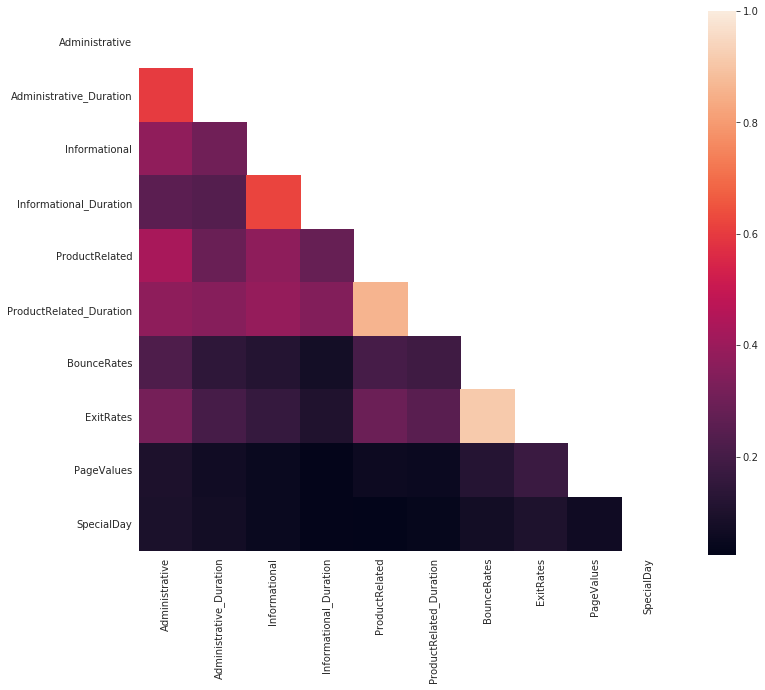

In [23]:
# 2nd heatmap without duplicates
# source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=1, square=True)

### Correlation Features (with normalization) ###

In [24]:
#source:  https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

# create a function to drop the redundant pairs in the correlation matrix (all correlations are mirrored diagionaly)
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
# show top 'n' correlations (n=50)
get_top_abs_correlations(data_corr, n=50)

# only show correlations higher or equal to 0.5
get_top_abs_correlations(data_corr, n=50)[get_top_abs_correlations(data_corr, n=50) >= 0.5]

# Our threshold is set to 0.5 for dropping either one of the highly correlated variables


Top Absolute Correlations


BounceRates     ExitRates                  0.913004
ProductRelated  ProductRelated_Duration    0.860927
Informational   Informational_Duration     0.618955
Administrative  Administrative_Duration    0.601583
dtype: float64

In [25]:
# simple heatmap
#ax = sns.heatmap(corr_matrix, linewidths=.5)

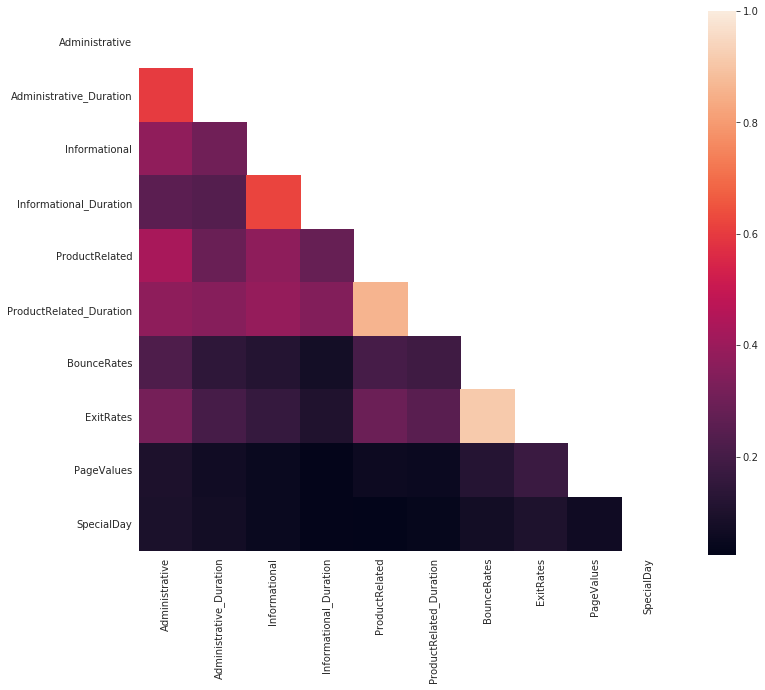

In [26]:
# 2nd heatmap without duplicates
# source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=1, square=True)

# Binning #

# Feature Selection #